# 1. Preparation

In [1]:
# Import modules
import os
import matplotlib.pyplot as plt
import cv2

from xml.etree.ElementTree import parse

# 2. Load Annotation Info

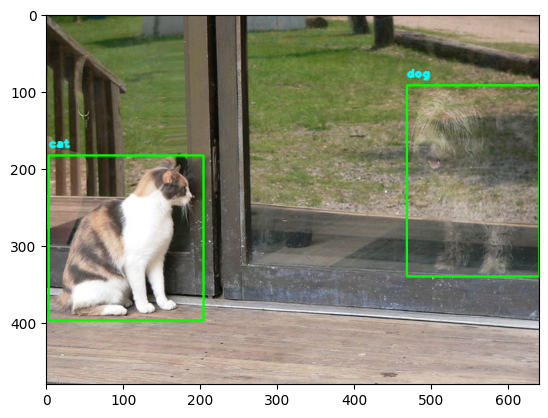

In [13]:
# Define xml_read
def xml_read(xml_path): 
    
    # Get a root info
    root = parse(xml_path).getroot()
    
    # Search a node named 'image'
    image_info = root.findall('image')
    
    # Get detailed information from 'image' node
    for image in image_info:
        
        ################
        # Search a node named 'box'
        bbox = image.findall('box')
        
        ################
        # Get image size
        image_width = image.attrib['width']
        image_height = image.attrib['height']
        #print(f'Image size: {image_width}x{image_height}')
        
        # Get image name
        image_name = image.attrib['name']
        #print('Name of image: ', image_name)
        
        # Get an image path
        image_path = os.path.join('./data/', image_name)
        #print('Image path: ', image_path)
        
        ################
        # Load images
        image = cv2.imread(image_path)
        
        # Convert BGR to RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        ################        
        # Get coordinates of bounding boxes
        for box_info in bbox:
            label = box_info.attrib['label']
            #print(label)
            
            # Get coordinates
            # Note: Coordinates are in string -> Should be changed to `int` type
            xtl = box_info.attrib['xtl']
            ytl = box_info.attrib['ytl']
            xbr = box_info.attrib['xbr']
            ybr = box_info.attrib['ybr']
            #print(xtl, ytl, xbr, ybr)
            
            # string -> float
            xtl_i = int(float(xtl))
            ytl_i = int(float(ytl))
            xbr_i = int(float(xbr))
            ybr_i = int(float(ybr))
            #print(xtl_i, ytl_i, xbr_i, ybr_i)
            
            # Draw a rectangle on labels
            image = cv2.rectangle(image,
                                 (xtl_i, ytl_i),
                                 (xbr_i, ybr_i),
                                 (0, 255, 0),
                                 2)
            
            # Add labels
            image = cv2.putText(image,
                               label,
                               (xtl_i, ytl_i-10),
                               cv2.FONT_HERSHEY_PLAIN,
                               1,
                               (0, 255, 255),
                               2,
                               cv2.LINE_AA)
        plt.imshow(image)
        plt.show()
        
        
xml_read('./data/cat_dog_annotation_xml.xml')